In [1]:
import gymnasium
import highway_env

from matplotlib import pyplot as plt
from utils import record_videos, show_videos





/Users/jonah/Desktop/ReinforcementLearning/.venv/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [2]:
env = gymnasium.make('highway-fast-v0', render_mode='rgb_array',max_episode_steps=-1,config={"reward_speed_range": [25, 30]})

In [3]:
from algorithms.Agent import Agent
from algorithms.RDQN import RDQN

# agent = TestAgent(env)


agent: Agent = RDQN(env)

In [4]:
NUM_EPISODES = 500
total_rewards = []
env.reset()
# env = record_videos(env)

for episode in range(NUM_EPISODES):
  print(f"Episode {episode}")
  total_reward = 0
  done = truncated = False

  obs, info = env.reset()
  while not (done or truncated):
    action = agent.predict(obs.flatten())

    next_obs, reward, done, truncated, info = env.step(action)
    total_reward += reward
    agent.learn(obs.flatten(),action,reward,(done,next_obs.flatten()))

    obs=next_obs
  total_rewards.append(total_reward)
  print(f"Total Reward: {total_reward}")


Episode 0
Total Reward: 2.2333333333333334
Episode 1
Total Reward: 16.900000000000013
Episode 2
Total Reward: 2.966666666666667
Episode 3
Total Reward: 6.633333333333334
Episode 4
Total Reward: 5.9
Episode 5
Total Reward: 3.7333333333333334
Episode 6
Total Reward: 5.933333333333334
Episode 7
Total Reward: 5.933333333333334
Episode 8
Total Reward: 8.866666666666667
Episode 9
Total Reward: 5.2
Episode 10
Total Reward: 3.0
Episode 11
Total Reward: 9.600000000000001
Episode 12
Total Reward: 9.56666666666667
Episode 13
Total Reward: 6.666666666666667
Episode 14
Total Reward: 7.366666666666667
Episode 15
Total Reward: 8.133333333333333
Episode 16
Total Reward: 2.2333333333333334
Episode 17
Total Reward: 1.5333333333333334
Episode 18
Total Reward: 16.900000000000013
Episode 19
Total Reward: 13.233333333333341
Episode 20
Total Reward: 2.2333333333333334
Episode 21
Total Reward: 11.766666666666673
Episode 22
Total Reward: 2.2666666666666666
Episode 23
Total Reward: 8.833333333333336
Episode 24


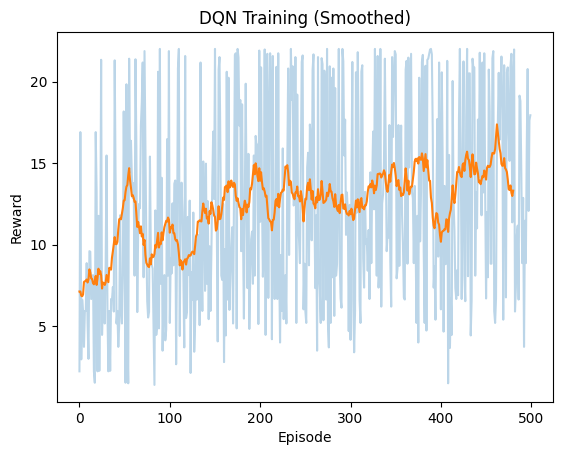

In [5]:
import matplotlib.pyplot as plt
import numpy as np

window = 20
smoothed = np.convolve(total_rewards, np.ones(window)/window, mode='valid')


plt.plot(total_rewards, alpha=0.3)
plt.plot(smoothed)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("DQN Training (Smoothed)")
plt.show()

In [7]:
NUM_EPISODES = 10
total_rewards = []
env = gymnasium.make('highway-v0', render_mode='rgb_array',config={"duration":40,"vehicles_count": 50})


for episode in range(NUM_EPISODES):
  print(f"Episode {episode}")
  done = truncated = False

  obs, info = env.reset()
  
  while not (done or truncated):
    action = agent.predict(obs.flatten())

    next_obs, reward, done, truncated, info = env.step(action)
    print(info)
    obs=next_obs
    env.render()


Episode 0
{'speed': 25.0, 'crashed': False, 'action': 2, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.6666666666666666), 'high_speed_reward': np.float64(0.4944220488427259), 'on_road_reward': 1.0}}
{'speed': 25.0, 'crashed': False, 'action': 2, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(1.0), 'high_speed_reward': np.float64(0.4933994436776903), 'on_road_reward': 1.0}}
{'speed': 25.0, 'crashed': False, 'action': 2, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(1.0), 'high_speed_reward': np.float64(0.4999509110612042), 'on_road_reward': 1.0}}
{'speed': 25.0, 'crashed': False, 'action': 2, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(1.0), 'high_speed_reward': np.float64(0.49999975529679047), 'on_road_reward': 1.0}}
{'speed': 25.0, 'crashed': False, 'action': 2, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(1.0), 'high_speed_reward': np.float64(0.49999999890917196), 'o